# Predicting Fire Alarms using Smoke Detection Dataset

The objective of this project it to predict the presence of fire in an area using parameters that the smoke detector sensores measure. Therefore, this project will not focus much on interpretation.

## Importing libraries

In [18]:
# Reading the data and dataset manipulation
import pandas as pd

# Linear algebra
import numpy as np

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Pipeline
from sklearn.pipeline import Pipeline

# Model selection

from sklearn.model_selection import GridSearchCV, train_test_split

# Model evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc

## Ignore warnings

In [19]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Reading the dataset

In [20]:
filename = '../input/smoke-detection-dataset/smoke_detection_iot.csv'

In [21]:
data = pd.read_csv(filename, index_col=0)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## Exploring the dataset

In [22]:
data.shape

(62630, 15)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


There are no missing values in the dataset, and all of the data is numeric.

In [24]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [25]:
data[data.duplicated()].sum()

UTC               0.0
Temperature[C]    0.0
Humidity[%]       0.0
TVOC[ppb]         0.0
eCO2[ppm]         0.0
Raw H2            0.0
Raw Ethanol       0.0
Pressure[hPa]     0.0
PM1.0             0.0
PM2.5             0.0
NC0.5             0.0
NC1.0             0.0
NC2.5             0.0
CNT               0.0
Fire Alarm        0.0
dtype: float64

No duplicates are present in the dataset

In [26]:
data.corr()['Fire Alarm'][:-1].sort_values(ascending=False)

CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64

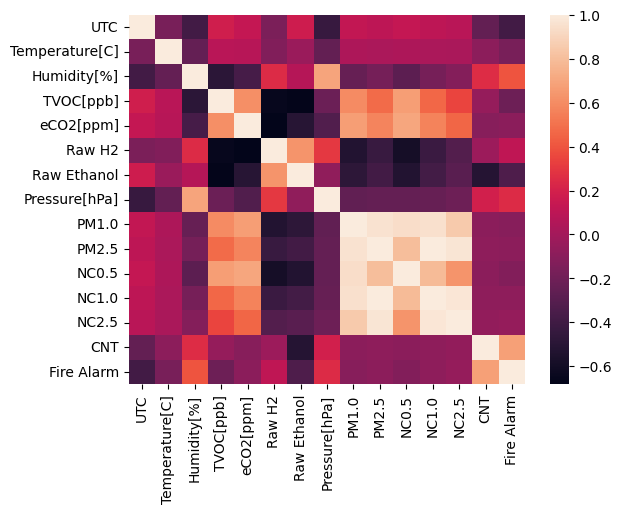

In [27]:
ax = sns.heatmap(data.corr())

In [28]:
target_column = 'Fire Alarm'
X = data.loc[:, data.columns != target_column]
y = data[[target_column]]

## Scaling the feature columns

In [29]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.050600,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.050603,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004
2,0.050605,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008
3,0.050607,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012
4,0.050610,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016


In [30]:
import joblib
joblib.dump(scaler, '../out/minmax_scaler.joblib')

['../out/minmax_scaler.joblib']

## Check for unbalanced classes

In [31]:
data['Fire Alarm'].value_counts(normalize=True)

Fire Alarm
1    0.714626
0    0.285374
Name: proportion, dtype: float64

Here we can see that there is an imbalance in the classes of our target label

## Split data into train and test splits

**Note:** since there are imbalance between classes we will stratify the train and test splits

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [33]:
X_test.shape

(12526, 14)

In [34]:
y_train.value_counts(normalize=True)

Fire Alarm
1             0.714634
0             0.285366
Name: proportion, dtype: float64

In [35]:
y_test.value_counts(normalize=True)

Fire Alarm
1             0.714594
0             0.285406
Name: proportion, dtype: float64

The splits hold the same class ratio as the dataset

## Models - Fuzzy Inference System

In [36]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

# Define fuzzy input variables based on dataset features
temperature = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Temperature[C]')
humidity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Humidity[%]')
tvoc = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'TVOC[ppb]')
pressure = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Pressure[hPa]')
ethanol = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Raw Ethanol')
h2 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Raw H2')
nc05 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'NC0.5')
pm10 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'PM1.0')
pm25 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'PM2.5')
co2 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'eCO2[ppm]')
nc10 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'NC1.0')
nc25 = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'NC2.5')

# Define fuzzy output variable
fire_alarm = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Fire Alarm')

# Define membership functions for each variable
# Extract statistical information from the dataset
feature_stats = X_train.describe()

# Define fuzzy membership functions dynamically based on the describe() values
for feature_name, feature_object in zip(
    ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'Pressure[hPa]', 'Raw Ethanol', 'Raw H2', 
     'NC0.5', 'PM1.0', 'PM2.5', 'eCO2[ppm]', 'NC1.0', 'NC2.5'],
    [temperature, humidity, tvoc, pressure, ethanol, h2, nc05, pm10, pm25, co2, nc10, nc25]
):
    min_val = feature_stats.loc['min', feature_name]
    max_val = feature_stats.loc['max', feature_name]
    mean_val = feature_stats.loc['mean', feature_name]
    # Set membership functions using min, mean, and max
    feature_object['low'] = fuzz.trimf(feature_object.universe, [min_val, min_val, mean_val])
    feature_object['medium'] = fuzz.trimf(feature_object.universe, [min_val, mean_val, max_val])
    feature_object['high'] = fuzz.trimf(feature_object.universe, [mean_val, max_val, max_val])


# for feature in [temperature, humidity, tvoc, pressure, ethanol, h2, nc05, pm10, pm25, co2, nc10, nc25]:
#     feature['low'] = fuzz.trimf(feature.universe, [0, 0, 0.5])
#     feature['medium'] = fuzz.trimf(feature.universe, [0, 0.5, 1])
#     feature['high'] = fuzz.trimf(feature.universe, [0.5, 1, 1])

fire_alarm['no'] = fuzz.trimf(fire_alarm.universe, [0, 0, 0.5])
fire_alarm['yes'] = fuzz.trimf(fire_alarm.universe, [0.5, 1, 1])

# Rules for 'yes' fire alarm
rule1 = ctrl.Rule(temperature['high'] & humidity['high'] & tvoc['high'], fire_alarm['yes'])
rule2 = ctrl.Rule(pressure['high'] & ethanol['high'] & h2['medium'], fire_alarm['yes'])
rule3 = ctrl.Rule(nc05['medium'] & pm10['high'] & pm25['high'], fire_alarm['yes'])
rule4 = ctrl.Rule(co2['high'] & nc10['high'] & nc25['medium'], fire_alarm['yes'])
rule5 = ctrl.Rule(temperature['medium'] & tvoc['high'] & pressure['high'], fire_alarm['yes'])

# Rules for 'no' fire alarm
rule6 = ctrl.Rule(temperature['low'] | humidity['low'] | tvoc['low'], fire_alarm['no'])
rule7 = ctrl.Rule(pressure['low'] & ethanol['low'] & h2['low'], fire_alarm['no'])
rule8 = ctrl.Rule(nc05['low'] | pm10['low'] | pm25['low'], fire_alarm['no'])
rule9 = ctrl.Rule(co2['low'] | nc10['low'] & nc25['low'], fire_alarm['no'])

# Additional nuanced rules
rule10 = ctrl.Rule(temperature['medium'] & humidity['medium'] & tvoc['medium'], fire_alarm['yes'])
rule11 = ctrl.Rule(temperature['low'] & pressure['low'] & co2['low'], fire_alarm['no'])
rule12 = ctrl.Rule(humidity['high'] & tvoc['medium'] & pressure['high'], fire_alarm['yes'])
rule13 = ctrl.Rule(nc05['low'] & pm10['low'] & nc10['medium'], fire_alarm['no'])
rule14 = ctrl.Rule(ethanol['medium'] & h2['medium'] & tvoc['medium'], fire_alarm['yes'])


# Create a control system and simulation
fire_alarm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
fire_alarm_simulation = ctrl.ControlSystemSimulation(fire_alarm_ctrl)

# Function to predict fire alarm using fuzzy logic
def predict_fire_alarm_fuzzy(X):
    predictions = []
    for _, row in X.iterrows():
        fire_alarm_simulation.input['Temperature[C]'] = row['Temperature[C]']
        fire_alarm_simulation.input['Humidity[%]'] = row['Humidity[%]']
        fire_alarm_simulation.input['TVOC[ppb]'] = row['TVOC[ppb]']
        fire_alarm_simulation.input['Pressure[hPa]'] = row['Pressure[hPa]']
        fire_alarm_simulation.input['Raw Ethanol'] = row['Raw Ethanol']
        fire_alarm_simulation.input['Raw H2'] = row['Raw H2']
        fire_alarm_simulation.input['NC0.5'] = row['NC0.5']
        fire_alarm_simulation.input['PM1.0'] = row['PM1.0']
        fire_alarm_simulation.input['PM2.5'] = row['PM2.5']
        fire_alarm_simulation.input['eCO2[ppm]'] = row['eCO2[ppm]']
        fire_alarm_simulation.input['NC1.0'] = row['NC1.0']
        fire_alarm_simulation.input['NC2.5'] = row['NC2.5']
        fire_alarm_simulation.compute()
        predictions.append(1 if fire_alarm_simulation.output['Fire Alarm'] > 0.5 else 0)
    return predictions

In [ ]:
# Train and evaluate fuzzy logic
fuzzy_predictions = predict_fire_alarm_fuzzy(X_train)
fuzzy_results = {
    'Accuracy': accuracy_score(y_train, fuzzy_predictions),
    'Precision': precision_score(y_train, fuzzy_predictions),
    'Recall': recall_score(y_train, fuzzy_predictions),
    'F1': f1_score(y_train, fuzzy_predictions)
}

print("Fuzzy Logic Training Results:", fuzzy_results)

# Test on X_test
fuzzy_test_predictions = predict_fire_alarm_fuzzy(X_test)
fuzzy_test_results = {
    'Accuracy': accuracy_score(y_test, fuzzy_test_predictions),
    'Precision': precision_score(y_test, fuzzy_test_predictions),
    'Recall': recall_score(y_test, fuzzy_test_predictions),
    'F1': f1_score(y_test, fuzzy_test_predictions)
}

print("Fuzzy Logic Test Results:", fuzzy_test_results)


Fuzzy Logic Training Results: {'Accuracy': 0.28584544148171803, 'Precision': np.float64(1.0), 'Recall': np.float64(0.0006702787242361616), 'F1': np.float64(0.001339659503209601)}
Fuzzy Logic Test Results: {'Accuracy': 0.2859651923998084, 'Precision': np.float64(1.0), 'Recall': np.float64(0.000782035526756787), 'F1': np.float64(0.0015628488501897744)}


In [13]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


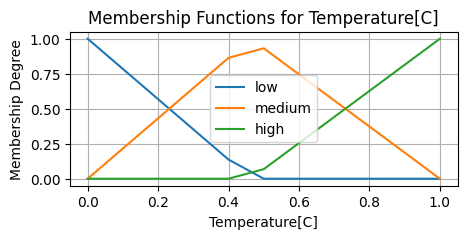

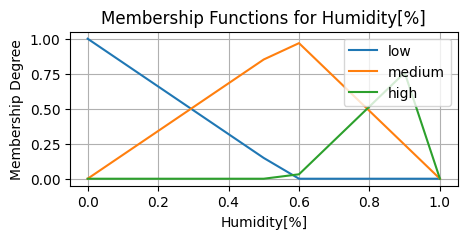

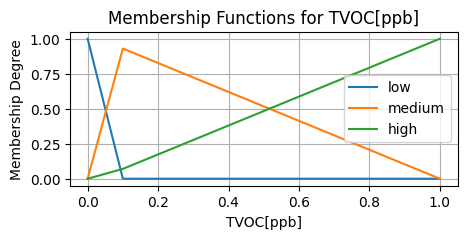

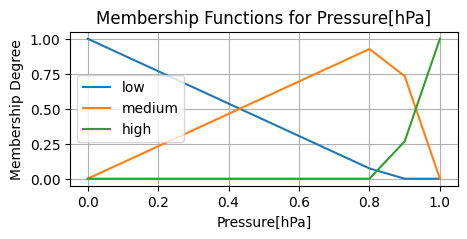

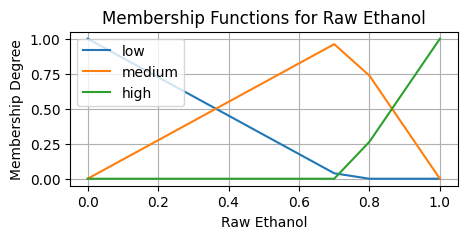

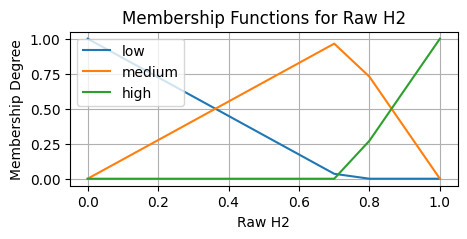

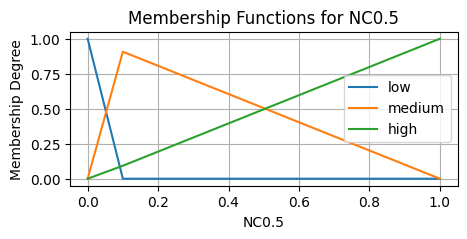

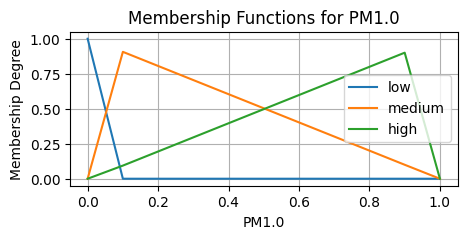

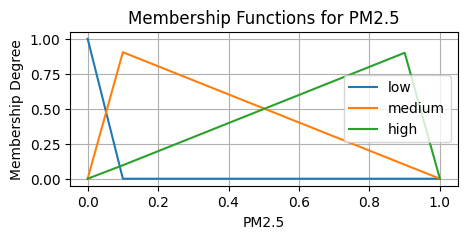

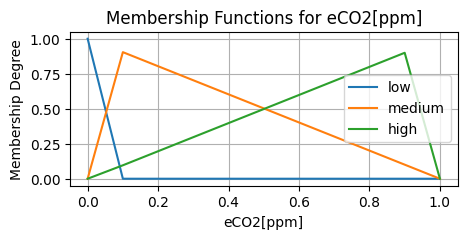

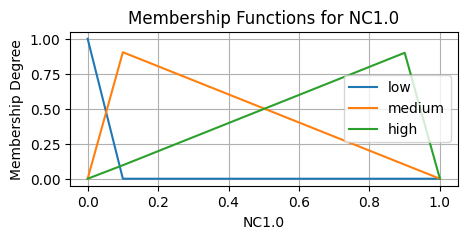

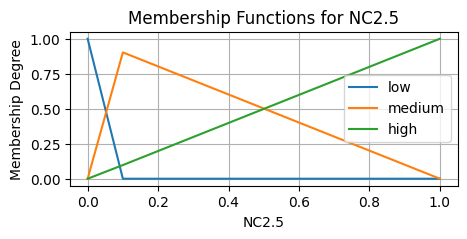

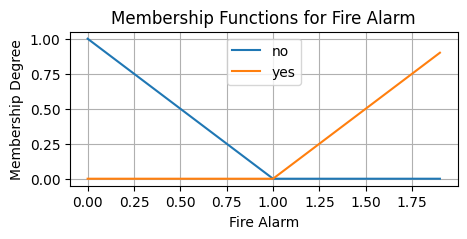

In [39]:
import matplotlib.pyplot as plt

# Visualize membership functions for Antecedents
def visualize_membership_functions(variables):
    for var_name, var_obj in variables.items():
        plt.figure(figsize=(5, 2))
        for label in var_obj.terms.keys():
            plt.plot(var_obj.universe, var_obj[label].mf, label=label)
        plt.title(f"Membership Functions for {var_name}")
        plt.xlabel(var_name)
        plt.ylabel('Membership Degree')
        plt.legend()
        plt.grid()
        plt.show()

# Combine all antecedents and the consequent in a dictionary for visualization
all_variables = {
    'Temperature[C]': temperature,
    'Humidity[%]': humidity,
    'TVOC[ppb]': tvoc,
    'Pressure[hPa]': pressure,
    'Raw Ethanol': ethanol,
    'Raw H2': h2,
    'NC0.5': nc05,
    'PM1.0': pm10,
    'PM2.5': pm25,
    'eCO2[ppm]': co2,
    'NC1.0': nc10,
    'NC2.5': nc25,
    'Fire Alarm': fire_alarm
}

# Call the visualization function
visualize_membership_functions(all_variables)


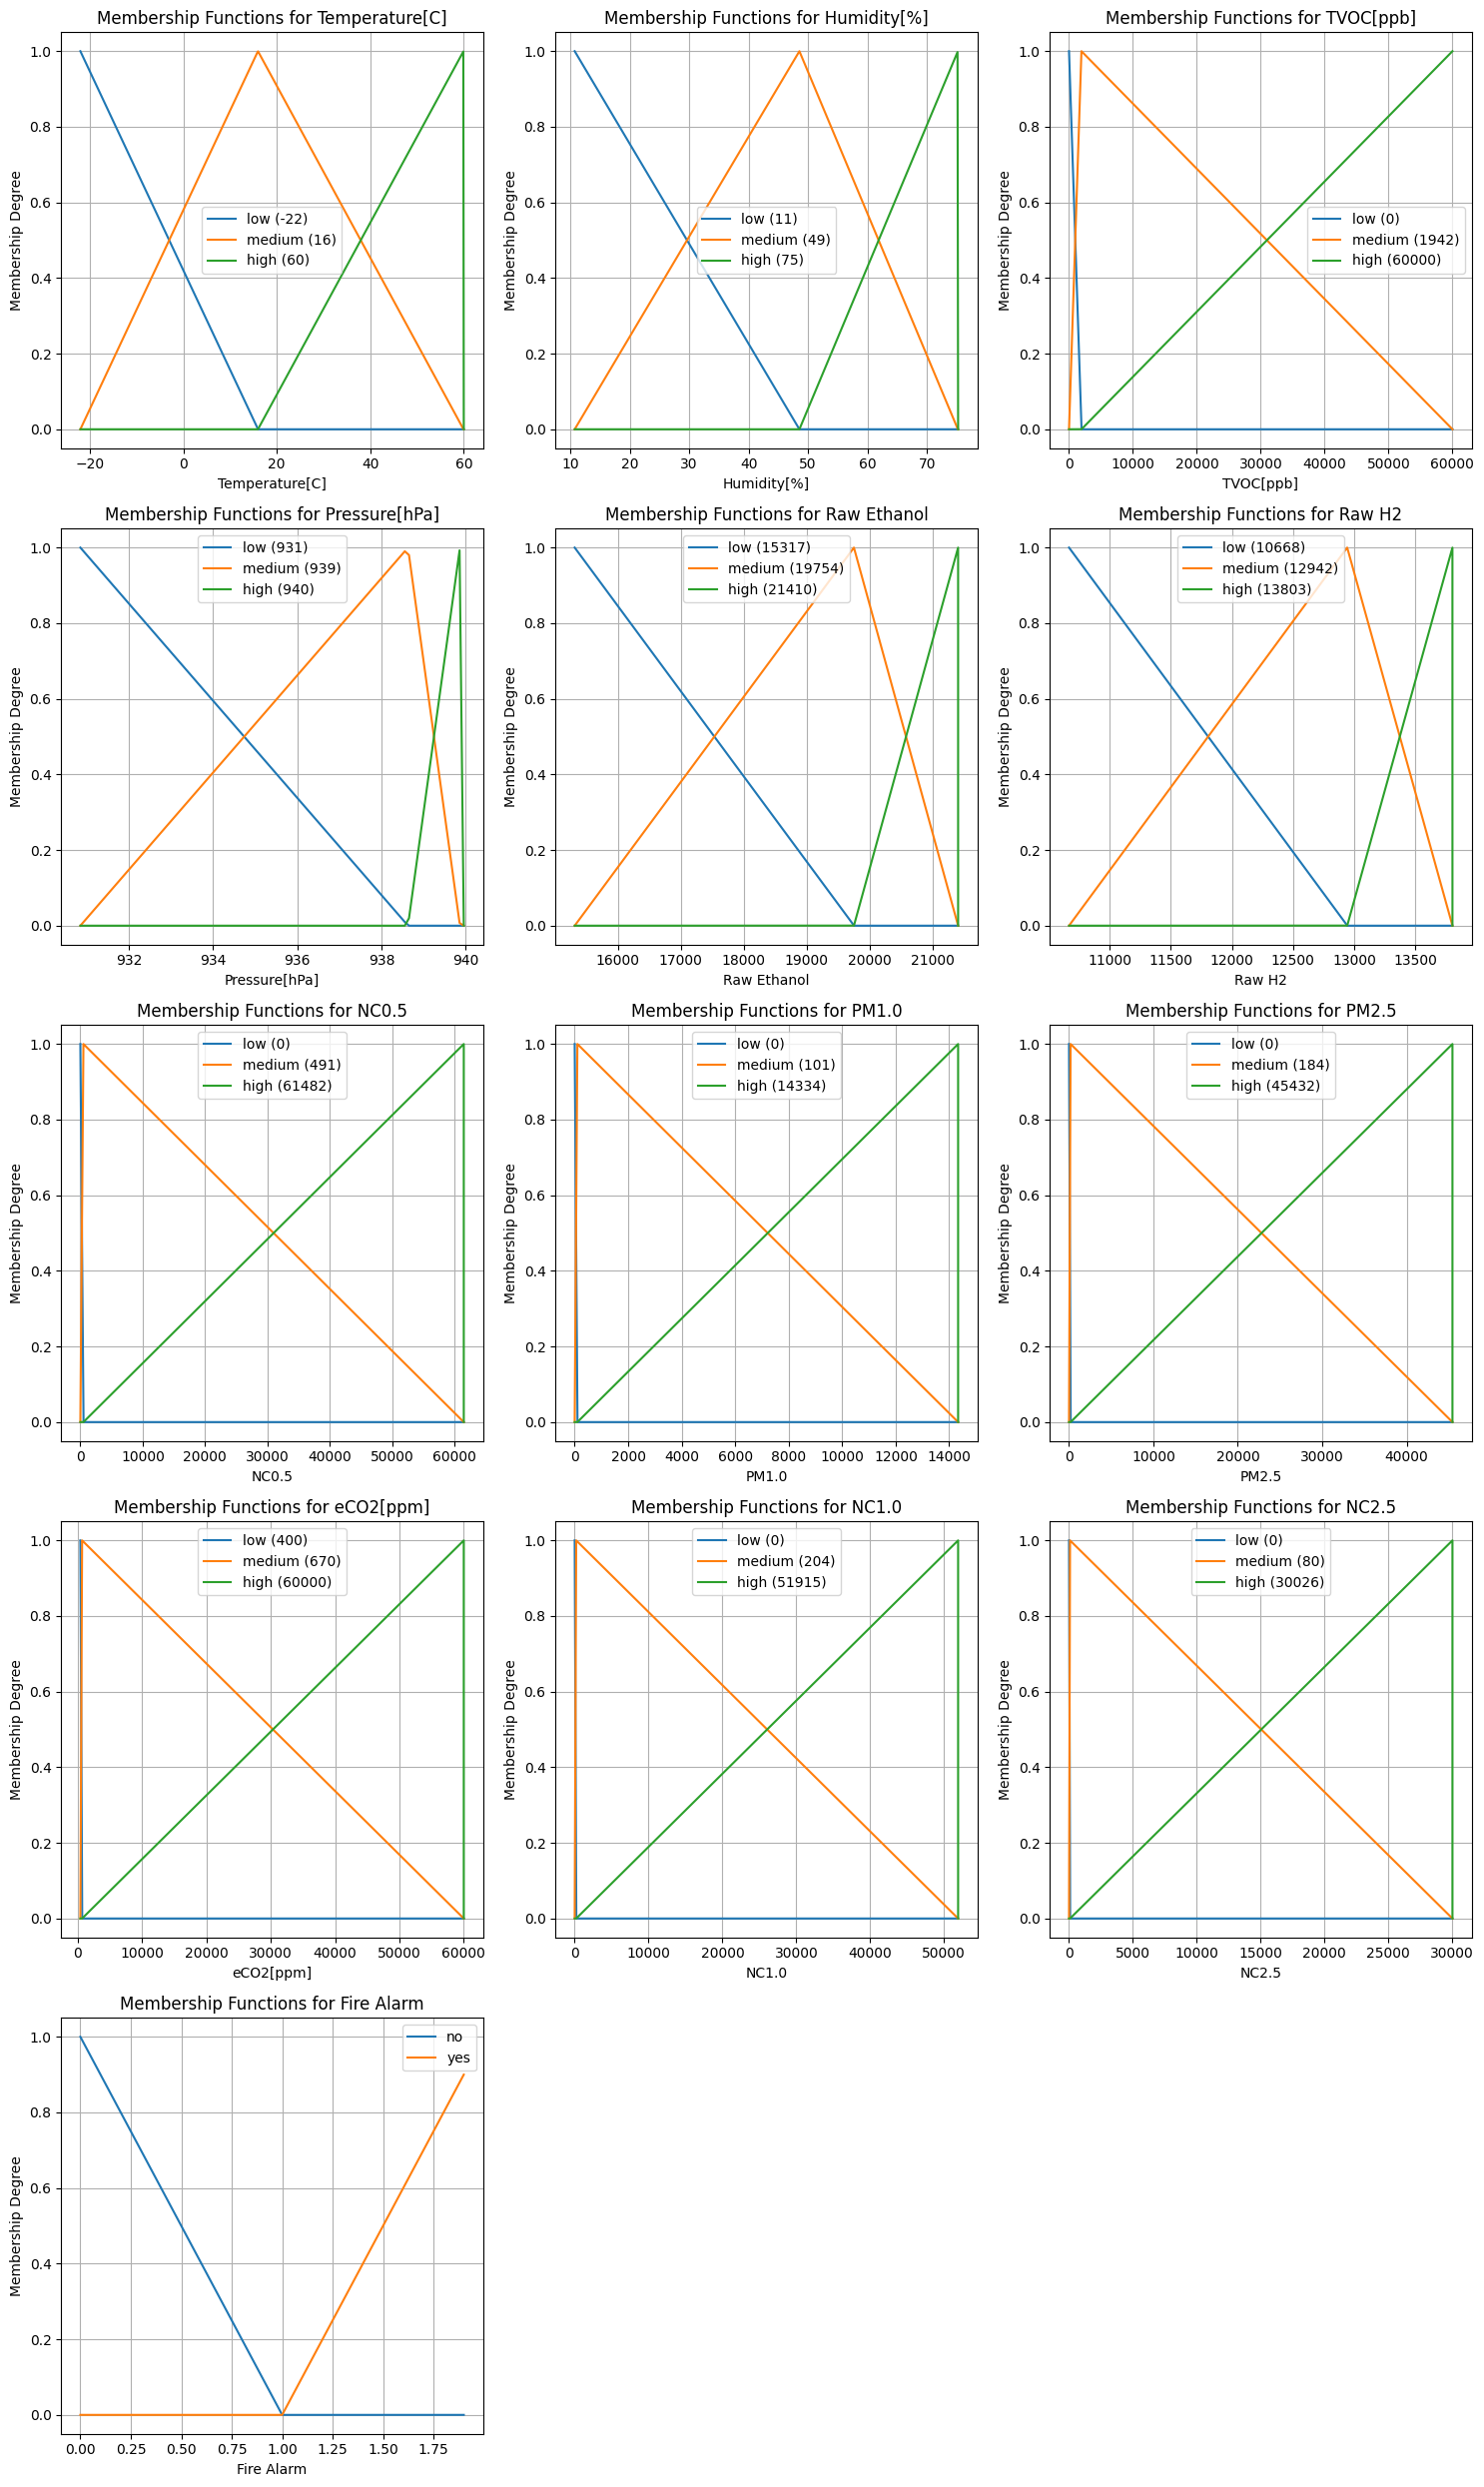

In [45]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

feature_stats = data.describe()
# Define fuzzy input variables based on original dataset feature ranges
temperature = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'Temperature[C]'], feature_stats.loc['max', 'Temperature[C]'] + 0.1, 0.1), 'Temperature[C]')
humidity = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'Humidity[%]'], feature_stats.loc['max', 'Humidity[%]'] + 0.1, 0.1), 'Humidity[%]')
tvoc = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'TVOC[ppb]'], feature_stats.loc['max', 'TVOC[ppb]'] + 0.1, 0.1), 'TVOC[ppb]')
pressure = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'Pressure[hPa]'], feature_stats.loc['max', 'Pressure[hPa]'] + 0.1, 0.1), 'Pressure[hPa]')
ethanol = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'Raw Ethanol'], feature_stats.loc['max', 'Raw Ethanol'] + 0.1, 0.1), 'Raw Ethanol')
h2 = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'Raw H2'], feature_stats.loc['max', 'Raw H2'] + 0.1, 0.1), 'Raw H2')
nc05 = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'NC0.5'], feature_stats.loc['max', 'NC0.5'] + 0.1, 0.1), 'NC0.5')
pm10 = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'PM1.0'], feature_stats.loc['max', 'PM1.0'] + 0.1, 0.1), 'PM1.0')
pm25 = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'PM2.5'], feature_stats.loc['max', 'PM2.5'] + 0.1, 0.1), 'PM2.5')
co2 = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'eCO2[ppm]'], feature_stats.loc['max', 'eCO2[ppm]'] + 0.1, 0.1), 'eCO2[ppm]')
nc10 = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'NC1.0'], feature_stats.loc['max', 'NC1.0'] + 0.1, 0.1), 'NC1.0')
nc25 = ctrl.Antecedent(np.arange(feature_stats.loc['min', 'NC2.5'], feature_stats.loc['max', 'NC2.5'] + 0.1, 0.1), 'NC2.5')

# Define fuzzy output variable
fire_alarm = ctrl.Consequent(np.arange(0, 2, 0.1), 'Fire Alarm')

# Define membership functions based on original ranges
for feature_name, feature_object in zip(
    ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'Pressure[hPa]', 'Raw Ethanol', 'Raw H2', 
     'NC0.5', 'PM1.0', 'PM2.5', 'eCO2[ppm]', 'NC1.0', 'NC2.5'],
    [temperature, humidity, tvoc, pressure, ethanol, h2, nc05, pm10, pm25, co2, nc10, nc25]
):
    min_val = feature_stats.loc['min', feature_name]
    max_val = feature_stats.loc['max', feature_name]
    mean_val = feature_stats.loc['mean', feature_name]
    feature_object[f'low ({int(round(min_val))})'] = fuzz.trimf(feature_object.universe, [min_val, min_val, mean_val])
    feature_object[f'medium ({int(round(mean_val))})'] = fuzz.trimf(feature_object.universe, [min_val, mean_val, max_val])
    feature_object[f'high ({int(round(max_val))})'] = fuzz.trimf(feature_object.universe, [mean_val, max_val, max_val])


fire_alarm['no'] = fuzz.trimf(fire_alarm.universe, [0, 0, 1])
fire_alarm['yes'] = fuzz.trimf(fire_alarm.universe, [1, 2, 2])

# Visualize membership functions for Antecedents and Consequents
def visualize_membership_functions_in_one_figure(variables):
    num_variables = len(variables)
    cols = 3  # Number of columns in the grid
    rows = (num_variables + cols - 1) // cols  # Calculate required rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()  # Flatten to handle the axes in a loop

    for idx, (var_name, var_obj) in enumerate(variables.items()):
        for label in var_obj.terms.keys():
            axes[idx].plot(var_obj.universe, var_obj[label].mf, label=label)
        axes[idx].set_title(f"Membership Functions for {var_name}")
        axes[idx].set_xlabel(var_name)
        axes[idx].set_ylabel('Membership Degree')
        axes[idx].legend()
        axes[idx].grid()

    # Hide any unused subplots
    for i in range(len(axes)):
        if i >= num_variables:
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()


# Combine all antecedents and the consequent in a dictionary for visualization
all_variables = {
    'Temperature[C]': temperature,
    'Humidity[%]': humidity,
    'TVOC[ppb]': tvoc,
    'Pressure[hPa]': pressure,
    'Raw Ethanol': ethanol,
    'Raw H2': h2,
    'NC0.5': nc05,
    'PM1.0': pm10,
    'PM2.5': pm25,
    'eCO2[ppm]': co2,
    'NC1.0': nc10,
    'NC2.5': nc25,
    'Fire Alarm': fire_alarm
}

# Call the visualization function
visualize_membership_functions_in_one_figure(all_variables)
